## Problem Statement

The following dataset contains information about the customers of a bank. Build a Machine Learning model to predict whether a customer will leave the Bank or not.

In [1]:
# Important Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Preprocessing modules
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler

# Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Metrics
from sklearn.metrics import plot_confusion_matrix, classification_report, plot_roc_curve

# Saving the model
import pickle

In [2]:
data = pd.read_csv('churn.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df = data.copy()
df.shape

(10000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
# Checking for presecne of null values specifically in O/P as well as in the I/P features
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### No null values present within the dataset

In [6]:
# We can clearly see a case of an Imbalanced Dataset here

df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

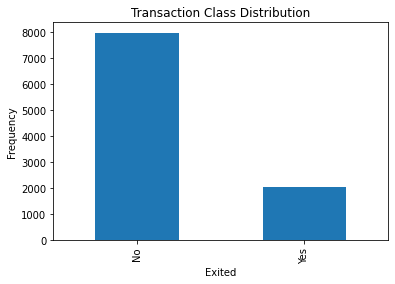

In [7]:
# Visualizing the Imbalance nature of the dataset

Labels = ["No", "Yes"]

count_classes = data['Exited'].value_counts()

count_classes.plot(kind = 'bar')

plt.title("Transaction Class Distribution")
plt.xticks([0, 1], Labels)
plt.xlabel("Exited")
plt.ylabel("Frequency")
plt.show()

### There is a clear case of Imbalance Dataset which needs to be handled

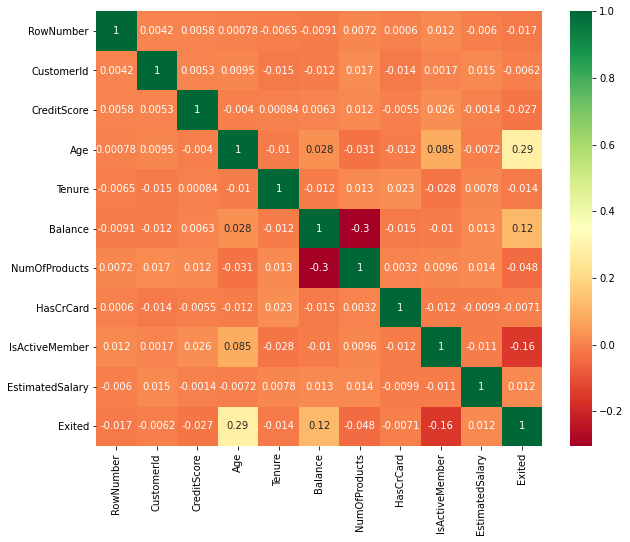

In [8]:
corr = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='RdYlGn')
plt.show()

### There isn't enough correlation among the input features in order to drop any of them

### Dropping uniquely identifying features:

1. RowNumber

2. CustomerId

3. Surname

In [9]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [10]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Preprocessing the Train & Test Datasets separately to avoid Data Leakage

## Train-Test Split

In [11]:
X = df.drop(['Exited'], axis=1)
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [12]:
y = df.Exited
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [14]:
y_train.value_counts()

0    5306
1    1394
Name: Exited, dtype: int64

In [15]:
y_test.value_counts()

0    2657
1     643
Name: Exited, dtype: int64

### Performing OverSampling using RandomOverSampler() method from imblearn library

In [16]:
sampler = RandomOverSampler()

### Resampling separately for Train data & Test data, in order to avoid Data Leakage

In [17]:
X_train_resampled, y_train_resampled = sampler.fit_resample(X_train, y_train)

In [18]:
y_train_resampled.value_counts()

1    5306
0    5306
Name: Exited, dtype: int64

In [19]:
X_test_resampled, y_test_resampled = sampler.fit_resample(X_test, y_test)

In [20]:
y_test_resampled.value_counts()

0    2657
1    2657
Name: Exited, dtype: int64

### Magnitude of the values for both the classes within the O/p feature is now well balanced

## Handling Categorical Features (Encoding)

In [21]:
# Appending all the features with dtype == 'object' (Categorical Features) in a list
cat_features = []

for col in X_train_resampled.columns :
    if X_train_resampled[col].dtype == 'object' :
        cat_features.append(col)
        
cat_features

['Geography', 'Gender']

In [22]:
X_train_resampled['Geography'].unique()

array(['Germany', 'France', 'Spain'], dtype=object)

In [23]:
dummies_geo = pd.get_dummies(X_train_resampled['Geography'], drop_first=True)
dummies_gender = pd.get_dummies(X_train_resampled['Gender'], drop_first=True)

In [24]:
encode_df = pd.concat([dummies_geo, dummies_gender], axis=1)
encode_df.head()

,Germany,Spain,Male
0,1,0,0
1,1,0,1
2,1,0,1
3,0,0,0
4,0,0,1


In [25]:
X_train = pd.concat([X_train_resampled, encode_df], axis=1)

In [26]:
X_train.drop(['Geography', 'Gender'], axis=1, inplace=True)

In [27]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,813,29,5,106059.40,1,0,0,187976.88,1,0,0
1,681,37,8,73179.34,2,1,1,25292.53,1,0,1
2,642,49,4,120688.61,1,1,0,24770.22,1,0,1
3,612,31,8,117989.76,1,1,1,54129.86,0,0,0
4,586,33,9,0.00,1,1,0,6975.02,0,0,1


### Encoding the Test Data separately

In [28]:
dummies_geo = pd.get_dummies(X_test_resampled['Geography'], drop_first=True)
dummies_gender = pd.get_dummies(X_test_resampled['Gender'], drop_first=True)

encode_df = pd.concat([dummies_geo, dummies_gender], axis=1)

X_test = pd.concat([X_test_resampled, encode_df], axis=1)

X_test.drop(['Geography', 'Gender'], axis=1, inplace=True)

In [29]:
X_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,596,32,3,96709.07,2,0,0,41788.37,1,0,1
1,623,43,1,0.00,2,1,1,146379.30,0,0,1
2,601,44,4,0.00,2,1,0,58561.31,0,1,0
3,506,59,8,119152.10,2,1,1,170679.74,1,0,1
4,560,27,7,124995.98,1,1,1,114669.79,0,1,0


In [30]:
# Changing the naming conventions for simplicity

y_train = y_train_resampled
y_test = y_test_resampled

In [31]:
X_test.tail()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
5309,535,48,9,0.00,1,1,0,149892.79,0,0,0
5310,661,64,8,128751.65,2,1,0,189398.18,1,0,0
5311,631,48,1,106396.48,1,1,1,150661.42,1,0,1
5312,507,36,9,118214.32,3,1,0,119110.03,1,0,1
5313,691,31,5,40915.55,1,1,0,126213.84,0,0,0


In [32]:
y_test.tail()

5309    1
5310    1
5311    1
5312    1
5313    1
Name: Exited, dtype: int64

## Training

### 1. RandomForest Model

In [33]:
rf = RandomForestClassifier()

In [34]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [35]:
rf.score(X_test, y_test)

0.7433195333082424

### 2. AdaBoost Model

In [36]:
ad = AdaBoostClassifier()

In [37]:
ad.fit(X_train, y_train)

AdaBoostClassifier()

In [38]:
ad.score(X_test, y_test)

0.7779450508091833

### 3. XGBoost Model

In [39]:
xg = XGBClassifier()

In [40]:
xg.fit(X_train, y_train)

E:\My ML Projects\mlprojects\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:08:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [41]:
xg.score(X_test, y_test)

0.7602559277380504

### 4. GradientBoost Model

In [42]:
gb = GradientBoostingClassifier()

In [43]:
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [44]:
gb.score(X_test, y_test)

0.7892359804290553

## Tuning the Hyperparameters of GradientBoost Model

In [45]:
params = {
    'learning_rate': [0.05, 0.1, 0.5, 0.9, 1],
    'n_estimators': [50, 70, 100, 200],
    'min_samples_leaf': [1,2,3,4,5,10]
}

In [46]:
rs = RandomizedSearchCV(gb, params, cv=5, n_iter=10)

In [47]:
best_model = rs.fit(X_train, y_train)

In [48]:
best_model.score(X_test, y_test)

0.7324049680090328

In [49]:
best_model.best_estimator_

GradientBoostingClassifier(learning_rate=0.9, n_estimators=200)

In [50]:
best_model.best_params_

{'n_estimators': 200, 'min_samples_leaf': 1, 'learning_rate': 0.9}

### Seems the model without Hyperparameter Tuning is performing better

In [51]:
best_model = gb

## Model Performance

In [52]:
y_pred = best_model.predict(X_test)

In [53]:
print("Classification Report: \n\n", classification_report(y_test, y_pred))

Classification Report: 

               precision    recall  f1-score   support

           0       0.77      0.82      0.80      2657
           1       0.81      0.75      0.78      2657

    accuracy                           0.79      5314
   macro avg       0.79      0.79      0.79      5314
weighted avg       0.79      0.79      0.79      5314



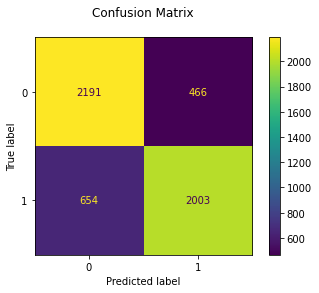

In [54]:
plot_confusion_matrix(best_model, X_test, y_test)
plt.title('Confusion Matrix\n')
plt.show()

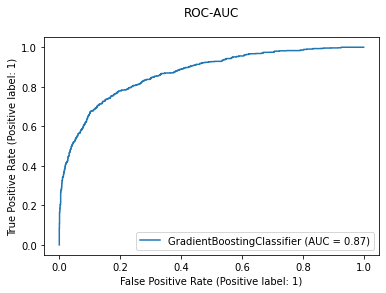

In [55]:
plot_roc_curve(best_model, X_test, y_test)
plt.title('ROC-AUC\n')
plt.show()

## Saving (Dumping) the Model

In [64]:
# open a file, where you want to store the data
file = open('churn_gradboost.pkl', 'wb')

# dump information to that file
pickle.dump(best_model, file)

In [65]:
model = open('churn_gradboost.pkl', 'rb')

## Predictions

In [58]:
X_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,596,32,3,96709.07,2,0,0,41788.37,1,0,1
1,623,43,1,0.00,2,1,1,146379.30,0,0,1
2,601,44,4,0.00,2,1,0,58561.31,0,1,0
3,506,59,8,119152.10,2,1,1,170679.74,1,0,1
4,560,27,7,124995.98,1,1,1,114669.79,0,1,0


In [59]:
y_test.head()

0    0
1    0
2    0
3    0
4    0
Name: Exited, dtype: int64

In [60]:
X_test.tail()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
5309,535,48,9,0.00,1,1,0,149892.79,0,0,0
5310,661,64,8,128751.65,2,1,0,189398.18,1,0,0
5311,631,48,1,106396.48,1,1,1,150661.42,1,0,1
5312,507,36,9,118214.32,3,1,0,119110.03,1,0,1
5313,691,31,5,40915.55,1,1,0,126213.84,0,0,0


In [61]:
y_test.tail()

5309    1
5310    1
5311    1
5312    1
5313    1
Name: Exited, dtype: int64

In [62]:
best_model.predict([[596,32,3,96709.07,2,0,0,41788.37,1,0,1]])

array([0], dtype=int64)

In [63]:
best_model.predict([[469,48,5,0,1,1,0,160529.71,0,0,0]])

array([1], dtype=int64)